In [7]:
import shap
import qiime2
from sklearn.pipeline import Pipeline
import pandas as pd
import biom
%matplotlib inline
shap.initjs()
import matplotlib.pyplot as plt

In [33]:
#ASD_Dan_Wang_Wan
fname = '../../../snakemake/data/ASD/GB-250samples_pictures-classifier_p100_0.3/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/ASD/GB-250samples_pictures-classifier_p100_0.3/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)


fname = '../../../snakemake/data/ASD/ASD_250_3studies.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]
#table_control_testing = table.loc[table_index.isin(md_test_control.index)]
#X_test = table_control_testing.loc[table_control_testing.index, feature_importances.index]

fname = '../../../snakemake/data/ASD/ASD_metadata_matched.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]
#md_test_control = md_test.loc[md_test['Status'] == 'Healthy']


fname = '../../../snakemake/data/ASD/GB-250samples_pictures-classifier_p100_0.3/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer(X_test)
# shap.plots.heatmap(shap_values,feature_values=shap_values.abs.max(0), show=False)
# plt.title('ASD SHAP')
# plt.savefig('ASD_and_controls_250_.pdf', bbox_inches = "tight")

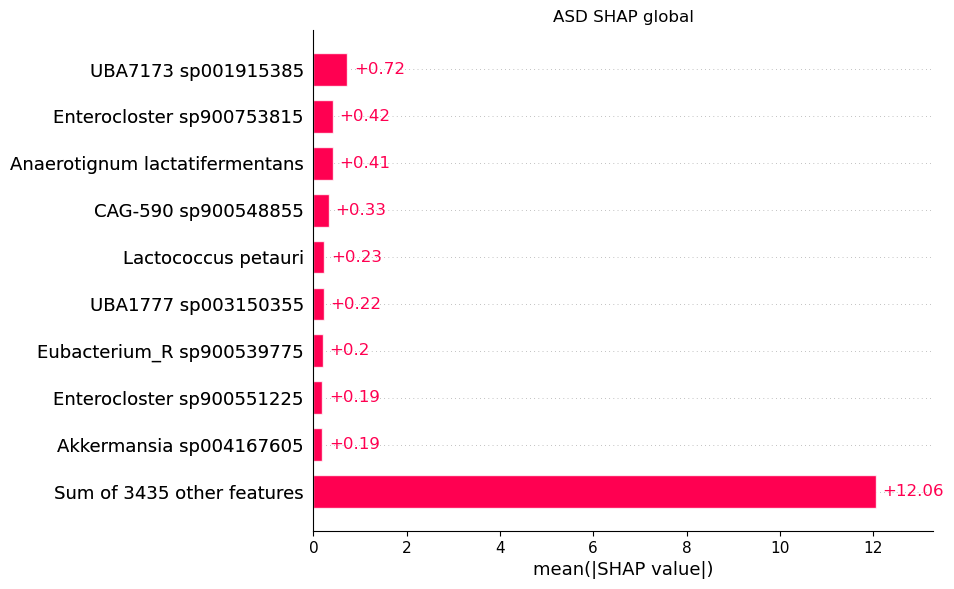

In [44]:
shap.plots.bar(shap_values, max_display=10,show=False)
plt.title('ASD SHAP global')
plt.savefig('ASD_barplot.pdf', bbox_inches = "tight")

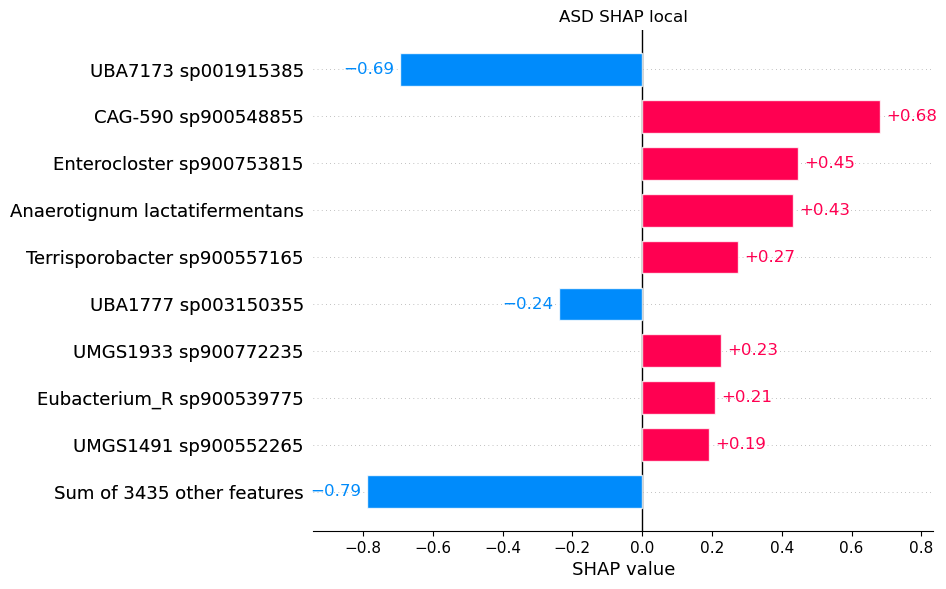

In [45]:
shap.plots.bar(shap_values[0],show=False)
plt.title('ASD SHAP local')
plt.savefig('ASD_barplot_local0.pdf', bbox_inches = "tight")

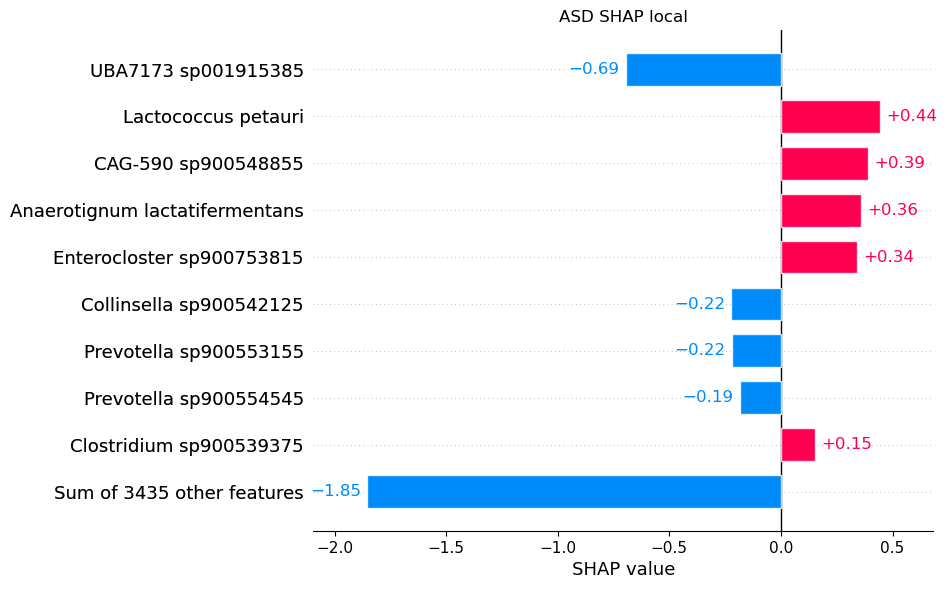

In [46]:
shap.plots.bar(shap_values[1],show=False)
plt.title('ASD SHAP local')
plt.savefig('ASD_barplot_local1.pdf', bbox_inches = "tight")

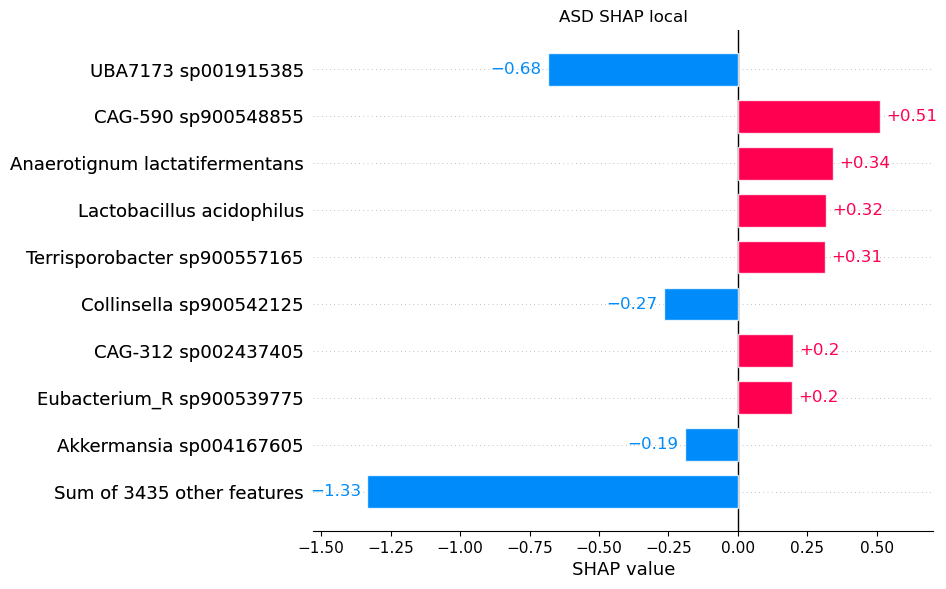

In [47]:
shap.plots.bar(shap_values[2],show=False)
plt.title('ASD SHAP local')
plt.savefig('ASD_barplot_local2.pdf', bbox_inches = "tight")

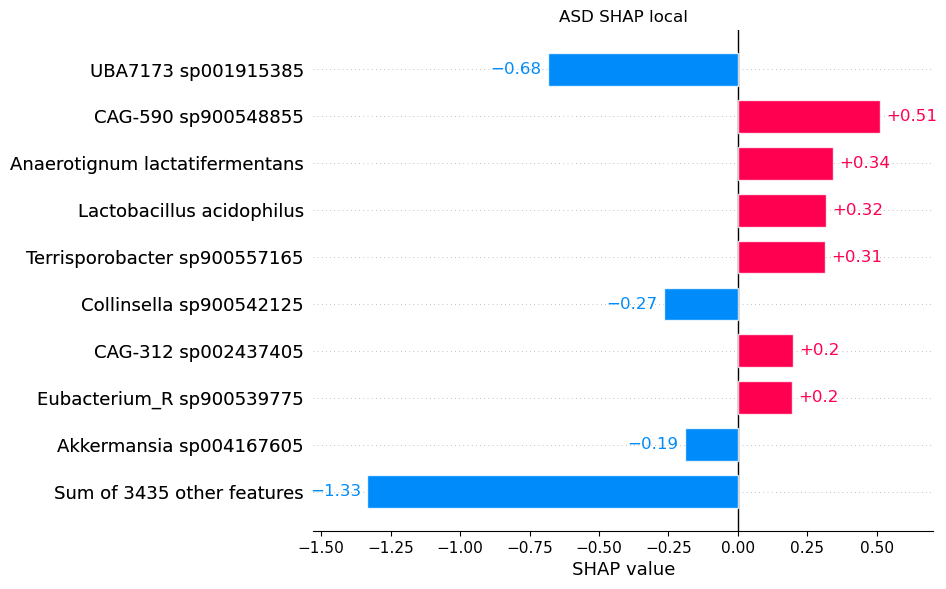

In [48]:
shap.plots.bar(shap_values[2],show=False)
plt.title('ASD SHAP local')
plt.savefig('ASD_barplot_local2.pdf', bbox_inches = "tight")

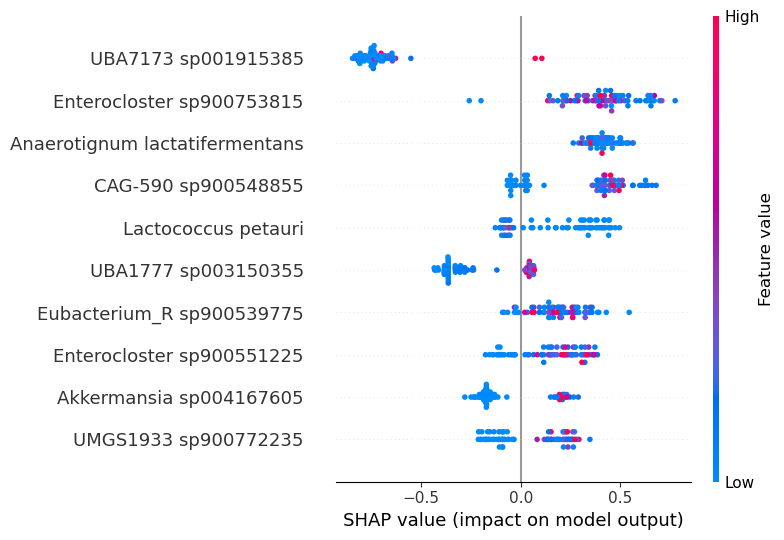

In [10]:
shap.summary_plot(shap_values, X_test, max_display=10)

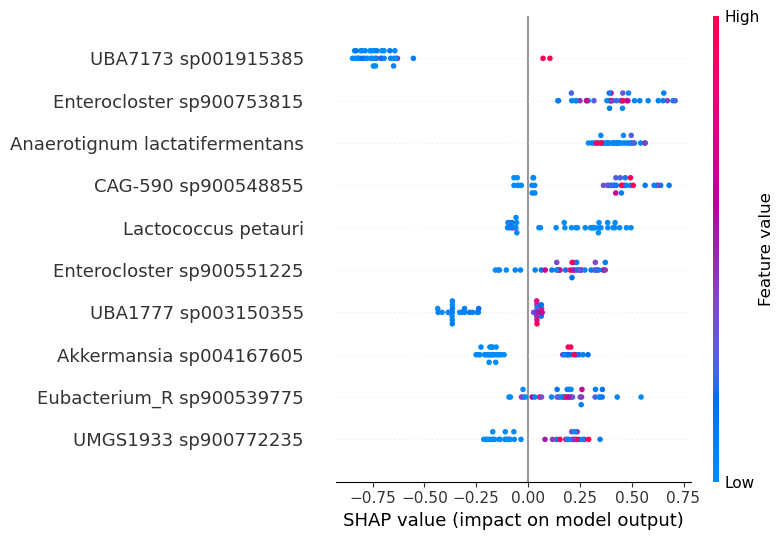

In [12]:
md_test_ASD = md_test.loc[md_test['Status'] == 'ASD']
pred_probs_ASD_testing = pred_probs.loc[pred_probs.index.isin(md_test_ASD.index)]
table_index = table.index
table_ASD_testing = table.loc[table_index.isin(md_test_ASD.index)]
X_test_ASD = table_ASD_testing.loc[pred_probs_ASD_testing.index, feature_importances.index]
fname = '../../../snakemake/data/ASD/GB-250samples_pictures-classifier_p100_0.3/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values_ASD = explainer(X_test_ASD)
shap.summary_plot(shap_values_ASD, X_test_ASD, max_display=10)

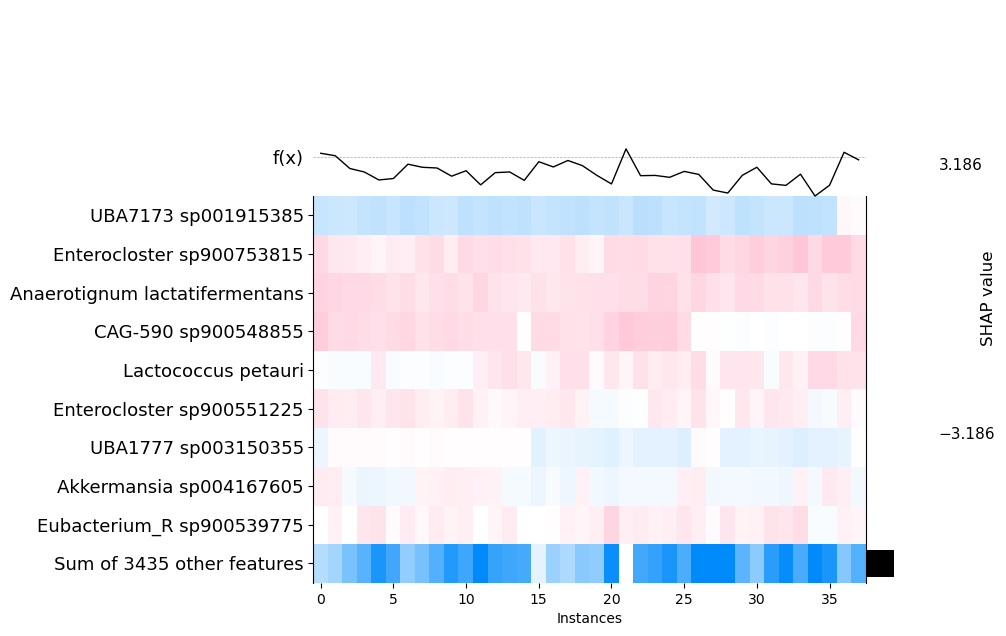

In [97]:
# compute SHAP values
import matplotlib.pyplot as plt
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer(X_test)
shap.plots.heatmap(shap_values, show=False)
#plt.savefig('ASD_250.pdf', bbox_inches = "tight")

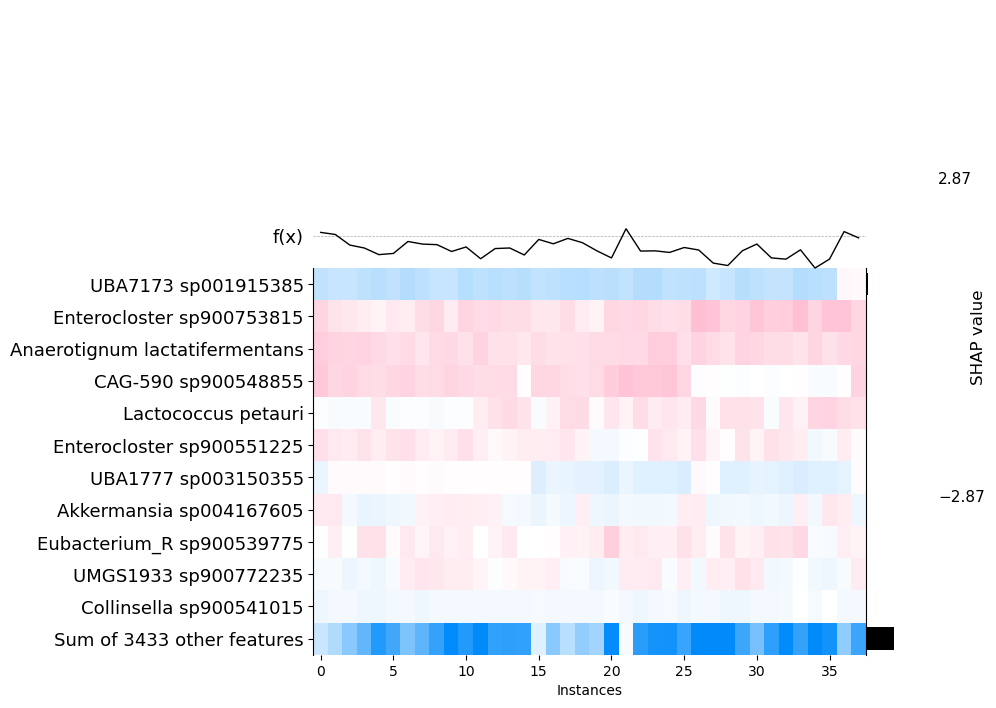

In [94]:
shap.plots.heatmap(shap_values, max_display=12)

In [82]:
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value, shap_values)

In [83]:
start_index = 2
end_index = 3
shap_values = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value, shap_values)

In [84]:
start_index = 3
end_index = 4
shap_values = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value, shap_values)

In [85]:
start_index = 4
end_index = 5
shap_values = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value, shap_values)

In [50]:
start_index = 5
end_index = 6
shap_values = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value, shap_values)

In [46]:
#shap.force_plot(shap_values, X_test_1)
#shap.force_plot(explainer.expected_value, shap_values)

In [61]:
start_index = 6
end_index = 7
shap_values = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value, shap_values)

In [62]:
start_index = 7
end_index = 8
shap_values = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value, shap_values)

In [63]:
start_index = 8
end_index = 9
shap_values = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value, shap_values)

In [31]:
#the values 
print(shap_values[0].shape)
shap_values

(3444,)


array([[3.52526569e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [33]:
#force plot
gb = GradientBoostingClassifier()
gb.fit()
prediction = gb.predict(X_test[:1])[0]
prediction

NameError: name 'GradientBoostingClassifier' is not defined

In [16]:
md_test_ASD = md_test.loc[md_test['Status'] == 'ASD']
md_test_ASD.index

Index(['SRR7057667', 'SRR13327461', 'SRR7057668', 'SRR13327466', 'SRR13327482',
       'SRR13327460', 'SRR13327450', 'SRR13327481', 'SRR13327480',
       'SRR13327475', 'SRR7057664', 'SRR13327497', 'SRR7057673', 'SRR7057653',
       'SRR7057652', 'SRR13327500', 'SRR13327440', 'SRR7057661', 'SRR7057657',
       'SRR13327498', 'ERR2608651', 'ERR2608632', 'SRR13327487', 'SRR13327471',
       'SRR7057658', 'SRR7057678', 'SRR13327463', 'SRR13327499', 'SRR13327462',
       'SRR7057663', 'SRR13327494', 'SRR13327469', 'ERR2608666', 'SRR7057651',
       'SRR13327534', 'SRR13327492', 'SRR13327453', 'ERR2608637'],
      dtype='object', name='id')

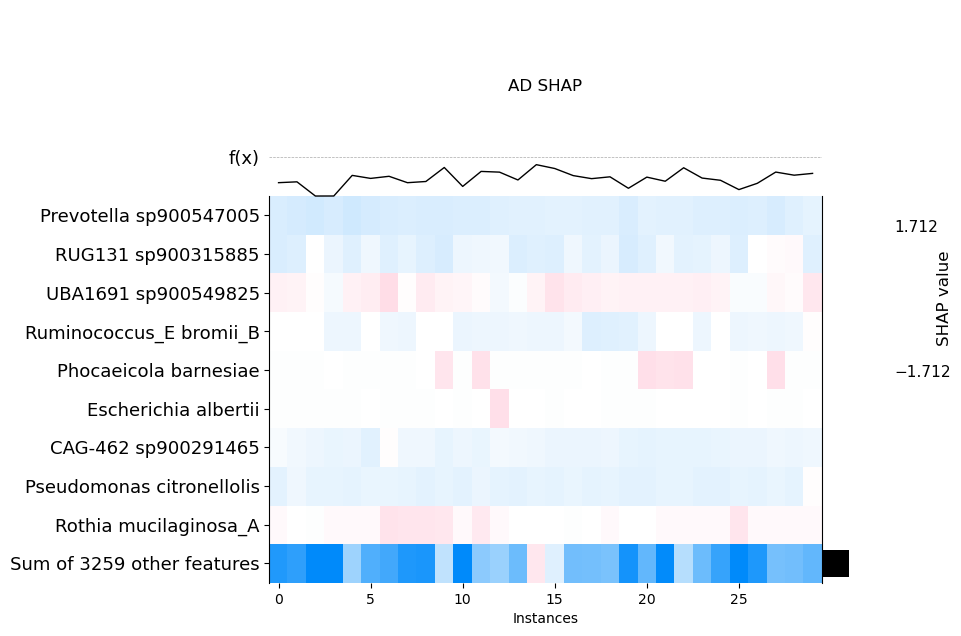

In [6]:
#1. Laske2022 Alzheimer's Disease(AD)
fname = '../../../snakemake/data/Laske2022AD/classify/GBmoving-pictures-classifier_matched_150samples_100p/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Laske2022AD/classify/GBmoving-pictures-classifier_matched_150samples_100p/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Laske2022AD/Laske2022AD_filtered.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Laske2022AD/Laske2022AD_metadata_matched.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Laske2022AD/classify/GBmoving-pictures-classifier_matched_150samples_100p/sample_estimator.qza'
# model = qiime2.Artifact.load(fname).view(Pipeline)
# explainer = shap.TreeExplainer(model['est'])
# shap_values = explainer.shap_values(X_test)

# shap.summary_plot(shap_values, X_test, max_display=15)

model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer(X_test)
#shap.summary_plot(shap_values, X_test)
shap.plots.heatmap(shap_values,feature_values=shap_values.abs.max(0), show=False)
plt.title('AD SHAP')
plt.savefig('AD_and_controls.pdf', bbox_inches = "tight")

In [4]:
type(shap_values)
df = pd.DataFrame(shap_values, columns = X_test.columns, index = X_test.index )
df.to_csv('../table/Laske2022AD_shapely.txt', sep = '\t') 

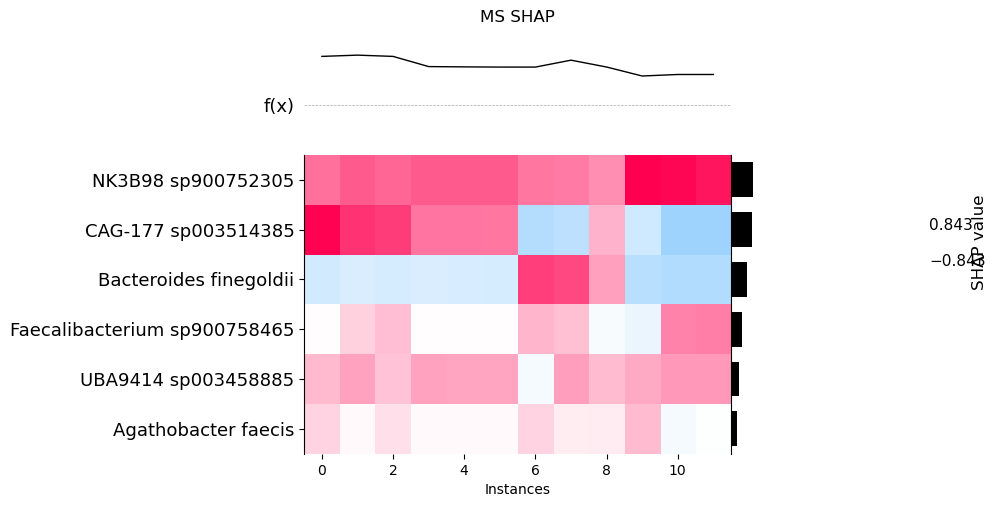

In [7]:
#2. iMSMS2021MS GradientBoosting
fname = '../../../snakemake/data/iMSMS2021MS/classify/moving-pictures-classifier_GB_p10/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/iMSMS2021MS/classify/moving-pictures-classifier_GB_p10/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/iMSMS2021MS/iMSMS2021MS_filtered.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/iMSMS2021MS/iMSMS2021MS_metadata_matched.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/iMSMS2021MS/classify/moving-pictures-classifier_GB_p10/sample_estimator.qza'
# model = qiime2.Artifact.load(fname).view(Pipeline)
# explainer = shap.TreeExplainer(model['est'])
# shap_values = explainer.shap_values(X_test)

# shap.summary_plot(shap_values, X_test, max_display=30)

model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer(X_test)
#shap.summary_plot(shap_values, X_test)
shap.plots.heatmap(shap_values,feature_values=shap_values.abs.max(0), show=False)
plt.title('MS SHAP')
plt.savefig('MS_and_controls.pdf', bbox_inches = "tight")

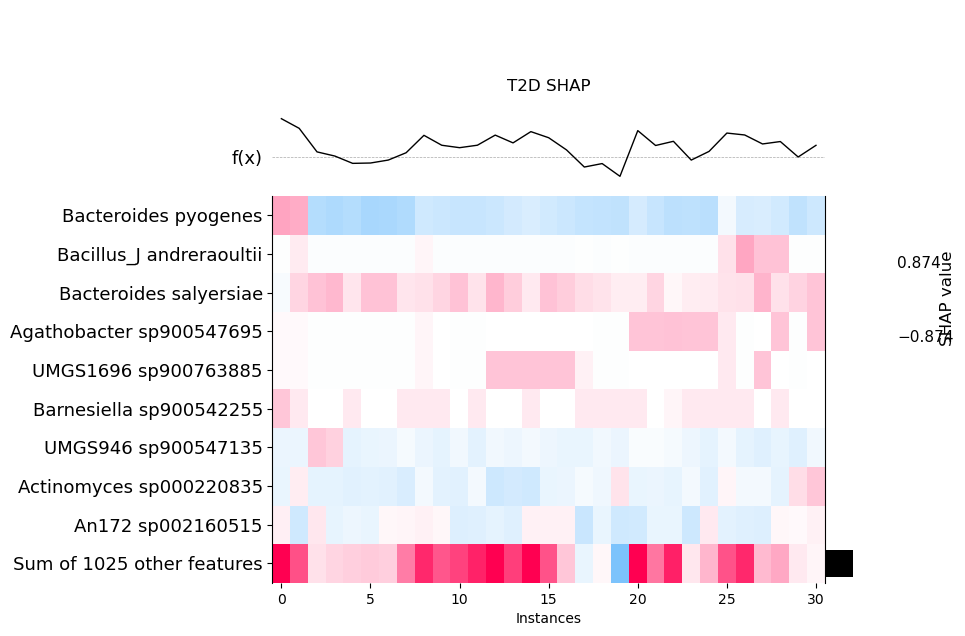

In [8]:
#3. T2D
fname = '../../../snakemake/data/Qin2012T2D/classify/moving-pictures-classifier_GB_2/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Qin2012T2D/classify/moving-pictures-classifier_GB_2/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Qin2012T2D/Qin2012T2D_filtered.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Qin2012T2D/Qin2012T2D_metadata_matched.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Qin2012T2D/classify/moving-pictures-classifier_GB_2/sample_estimator.qza'
# model = qiime2.Artifact.load(fname).view(Pipeline)
# explainer = shap.TreeExplainer(model['est'])
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, max_display=30)
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer(X_test)
#shap.summary_plot(shap_values, X_test)
shap.plots.heatmap(shap_values,feature_values=shap_values.abs.max(0), show=False)
plt.title('T2D SHAP')
plt.savefig('T2D_and_controls.pdf', bbox_inches = "tight")

In [34]:
shap.force_plot(explainer.expected_value[0], shap_values[0])
#shap.plots.force(shap_values)


In [35]:
type(shap_values)
df = pd.DataFrame(shap_values, columns = X_test.columns, index = X_test.index )
df.to_csv('../table/QinT2D_shapely.txt', sep = '\t') 

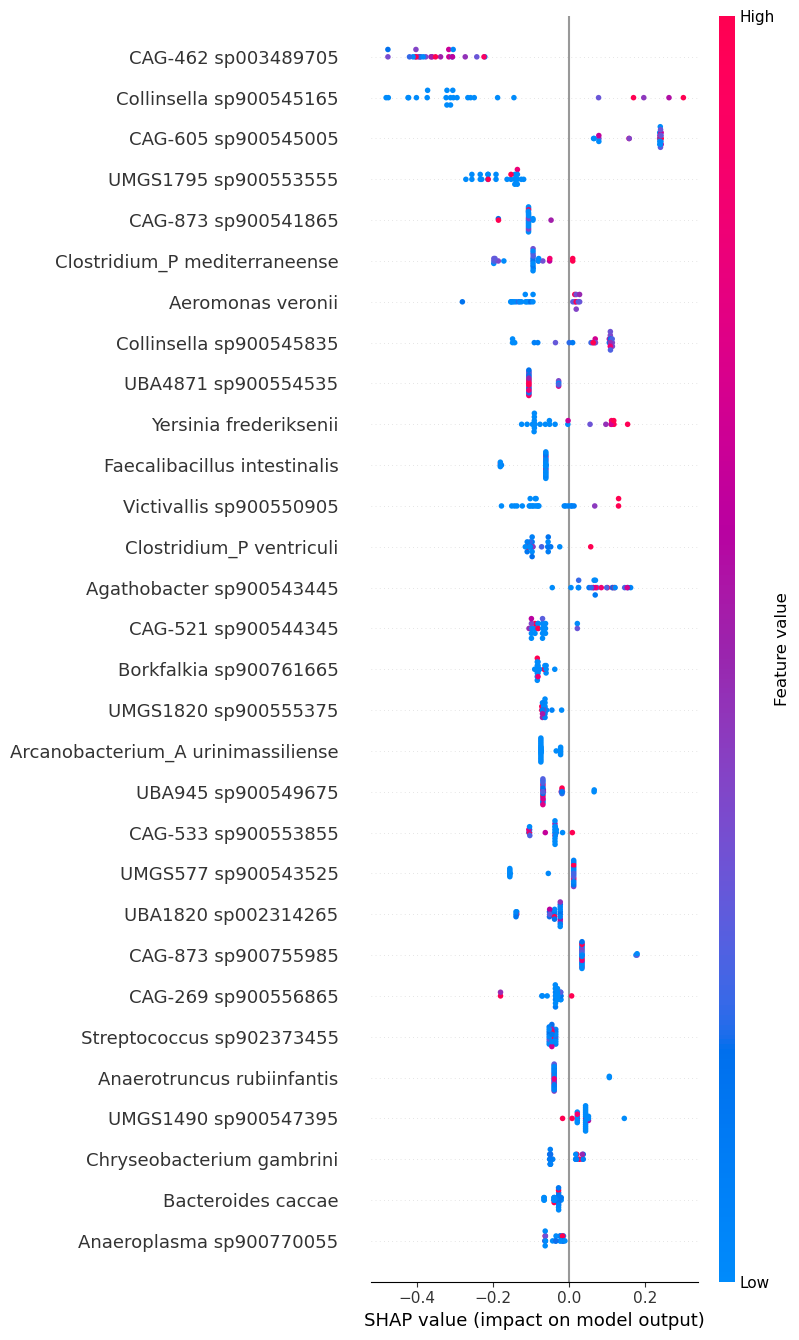

In [2]:
#4. ASD -- Dan and Wang
fname = '../../../snakemake/data/ASD/Dan_n_Wang/GB-122samples_pictures-classifier_p20/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/ASD/Dan_n_Wang/GB-122samples_pictures-classifier_p20/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/ASD/Dan_n_Wang/Dan_n_Wang.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/ASD/Dan_n_Wang/ASD_metadata_Dan_Wang.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/ASD/Dan_n_Wang/GB-122samples_pictures-classifier_p20/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=30)

In [4]:
type(shap_values)
df = pd.DataFrame(shap_values, columns = X_test.columns, index = X_test.index )
df.to_csv('../table/ASD_shapely.txt', sep = '\t') 

Text(0.5, 1.0, 'CD SHAP')

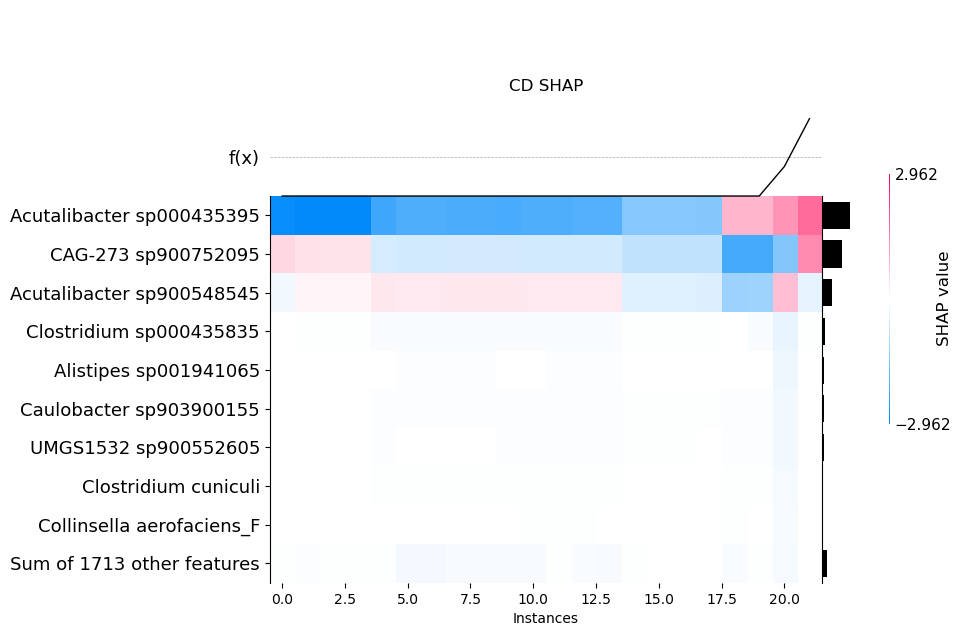

In [57]:
#5. Franzosa2019 -- Crohn’s Disease (IBD-CD)
fname = '../../../snakemake/data/Franzosa2019IBD/classify/GB-pictures-classifier_CD/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Franzosa2019IBD/classify/GB-pictures-classifier_CD/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Franzosa2019IBD/Franzosa2019CD_filtered.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Franzosa2019IBD/Metadata_CD_matched.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Franzosa2019IBD/classify/GB-pictures-classifier_CD/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
#shap_values = explainer.shap_values(X_test)

shap_values = explainer(X_test)
#shap.summary_plot(shap_values, X_test)
shap.plots.heatmap(shap_values,feature_values=shap_values.abs.max(0), show=False)
plt.title('CD SHAP')
#plt.savefig('CD_and_controls.pdf', bbox_inches = "tight")

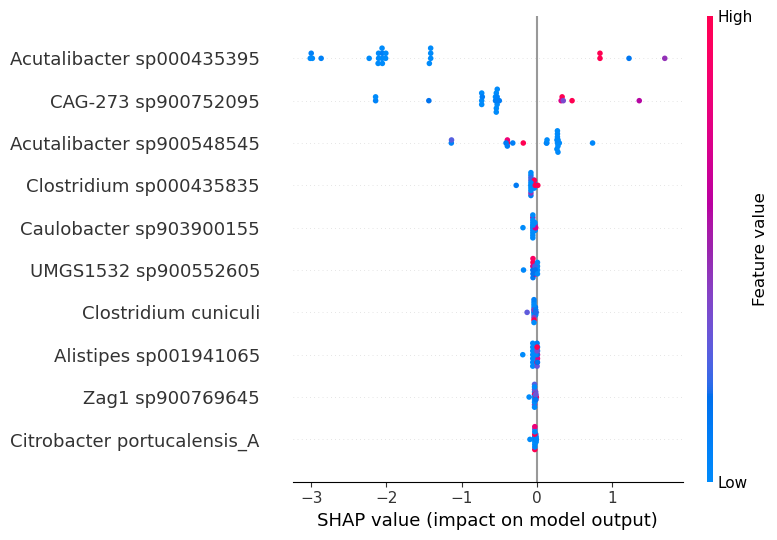

In [58]:
shap.summary_plot(shap_values, X_test, max_display=10)

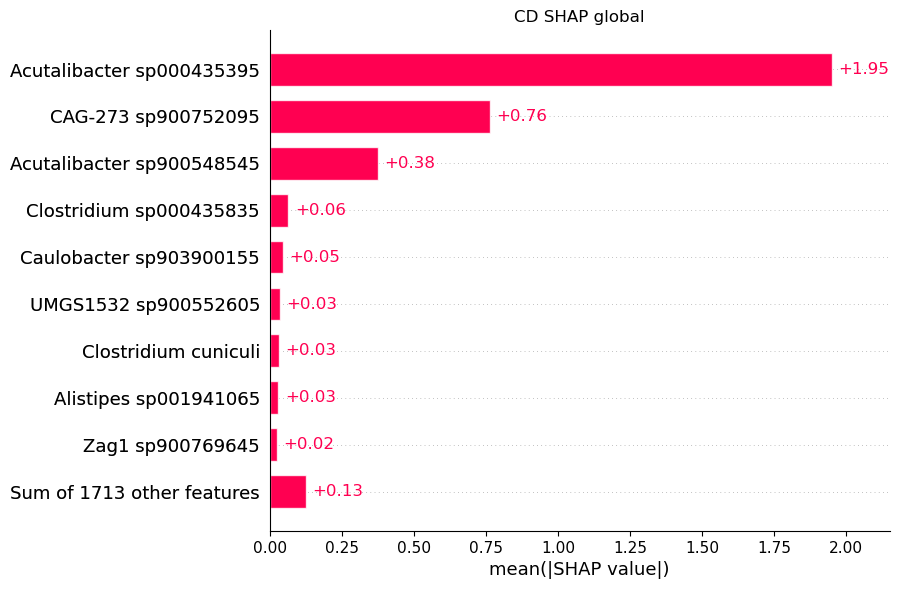

In [50]:
shap.plots.bar(shap_values,show=False)
plt.title('CD SHAP global')
plt.savefig('CD_barplot.pdf', bbox_inches = "tight")

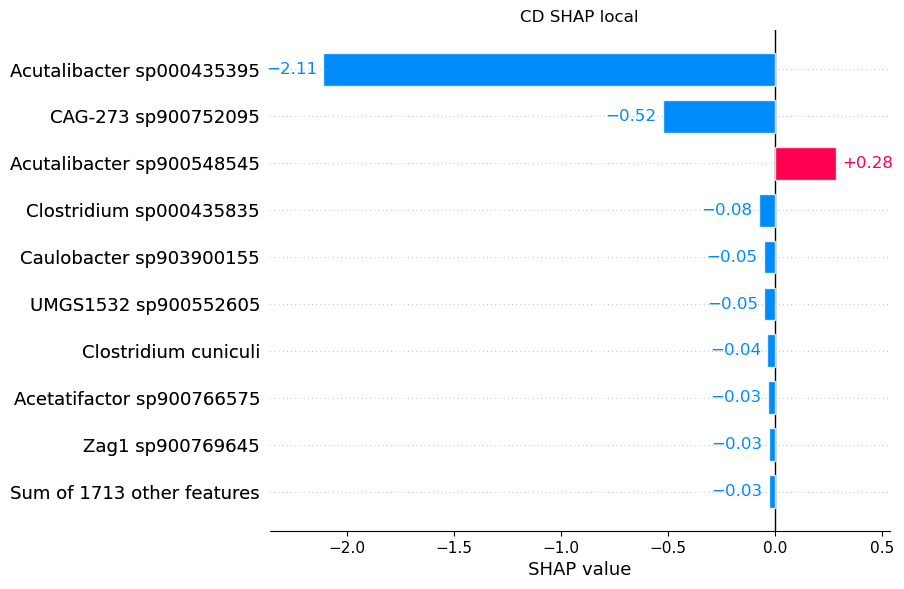

In [51]:
shap.plots.bar(shap_values[0],show=False)
plt.title('CD SHAP local')
plt.savefig('CD_barplot_local0.pdf', bbox_inches = "tight")

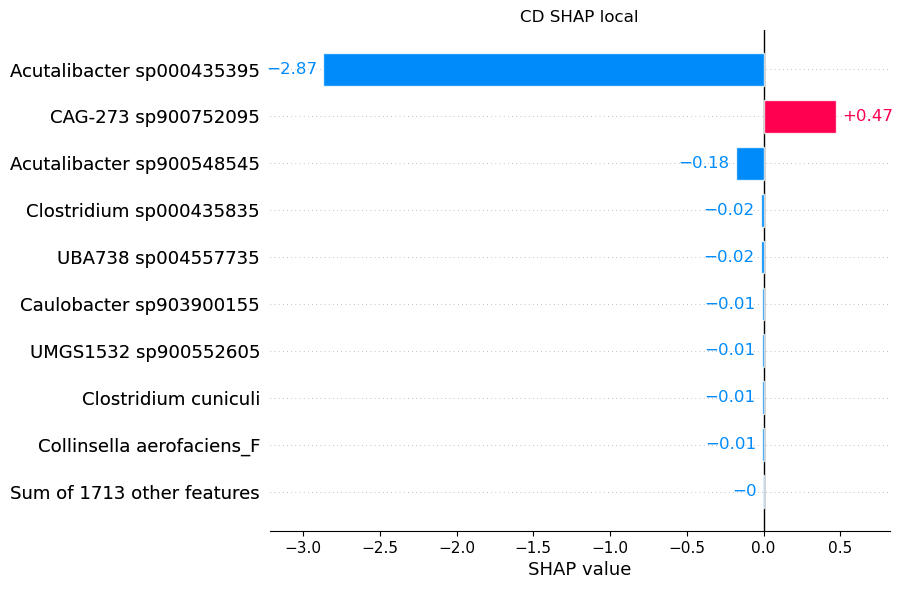

In [52]:
shap.plots.bar(shap_values[1],show=False)
plt.title('CD SHAP local')
plt.savefig('CD_barplot_local1.pdf', bbox_inches = "tight")

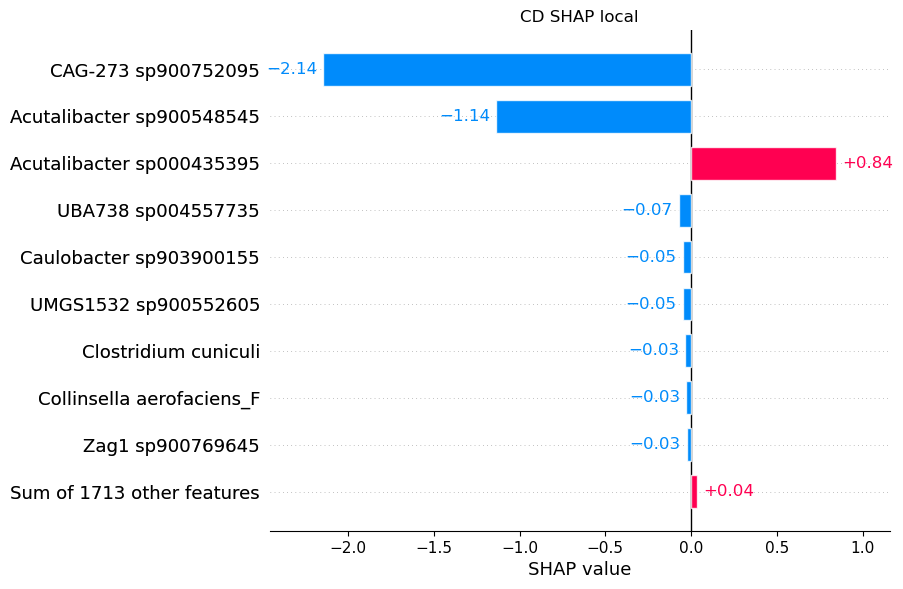

In [53]:
shap.plots.bar(shap_values[2],show=False)
plt.title('CD SHAP local')
plt.savefig('CD_barplot_local2.pdf', bbox_inches = "tight")

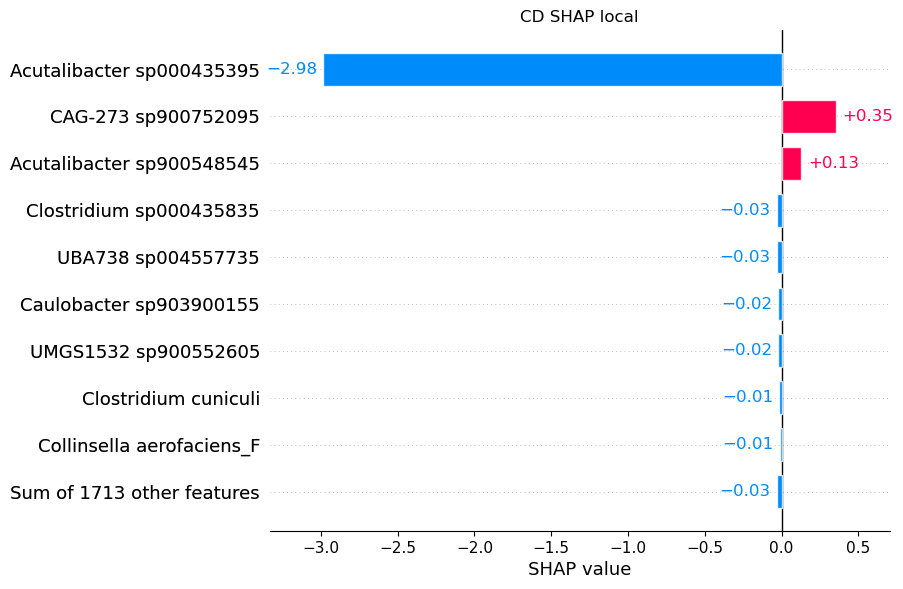

In [55]:
shap.plots.bar(shap_values[3],show=False)
plt.title('CD SHAP local')
plt.savefig('CD_barplot_local3.pdf', bbox_inches = "tight")

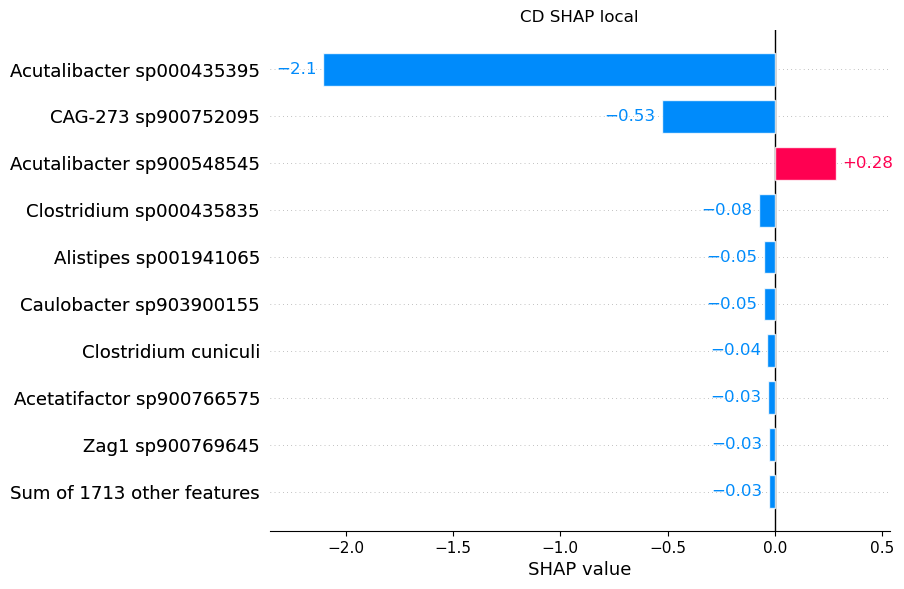

In [56]:
shap.plots.bar(shap_values[4],show=False)
plt.title('CD SHAP local')
plt.savefig('CD_barplot_local4.pdf', bbox_inches = "tight")

In [6]:
type(shap_values)
df = pd.DataFrame(shap_values, columns = X_test.columns, index = X_test.index )
df.to_csv('../table/Franzosa2019CD_shapely.txt', sep = '\t') 

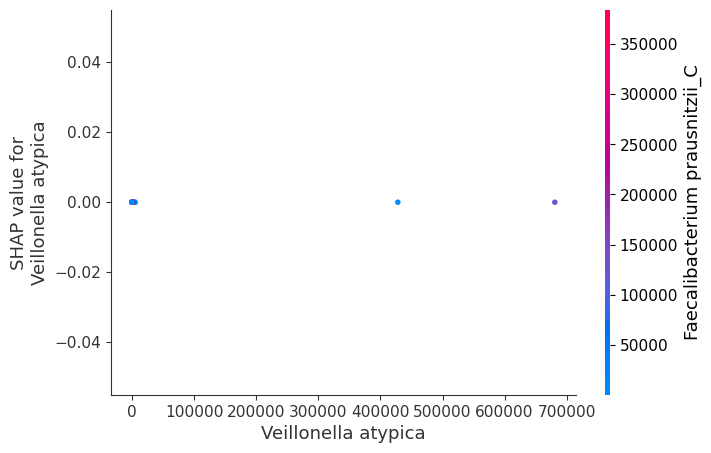

In [38]:
shap.dependence_plot('Veillonella atypica', shap_values, X_test)

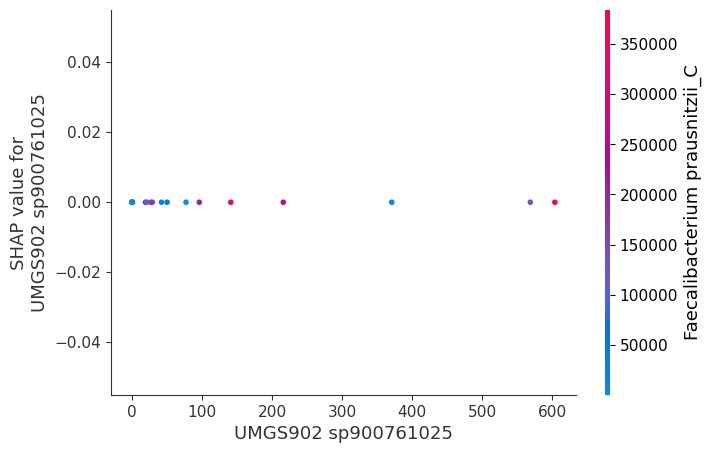

In [39]:
shap.dependence_plot(2, shap_values, X_test)

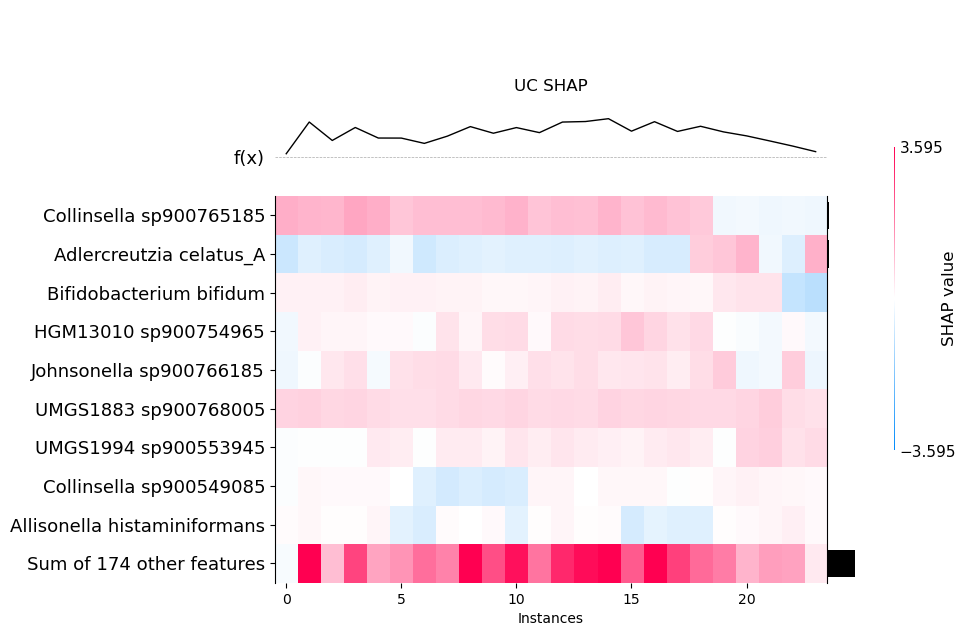

In [125]:
#6. Nielsen2014 Ulcerative Colitis (IBD-UC)
fname = '../../../snakemake/data/Nielsen2014_spain/classify/GB-pictures-classifier_118_p100/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Nielsen2014_spain/classify/GB-pictures-classifier_118_p100/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Nielsen2014_spain/classify/new_118_biom/feature-table.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Nielsen2014_spain/Nielsen2014UC_matched_new_1215.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Nielsen2014_spain/classify/GB-pictures-classifier_118_p100/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
# shap_values = explainer.shap_values(X_test)

# shap.summary_plot(shap_values, X_test, max_display=20)

shap_values = explainer(X_test)
#shap.summary_plot(shap_values, X_test)
shap.plots.heatmap(shap_values,feature_values=shap_values.abs.max(0), show=False)
plt.title('UC SHAP')
plt.savefig('UC_and_controls.pdf', bbox_inches = "tight")

In [8]:
type(shap_values)
df = pd.DataFrame(shap_values, columns = X_test.columns, index = X_test.index )
df.to_csv('../table/Nielsen2014UC_shapely.txt', sep = '\t') 

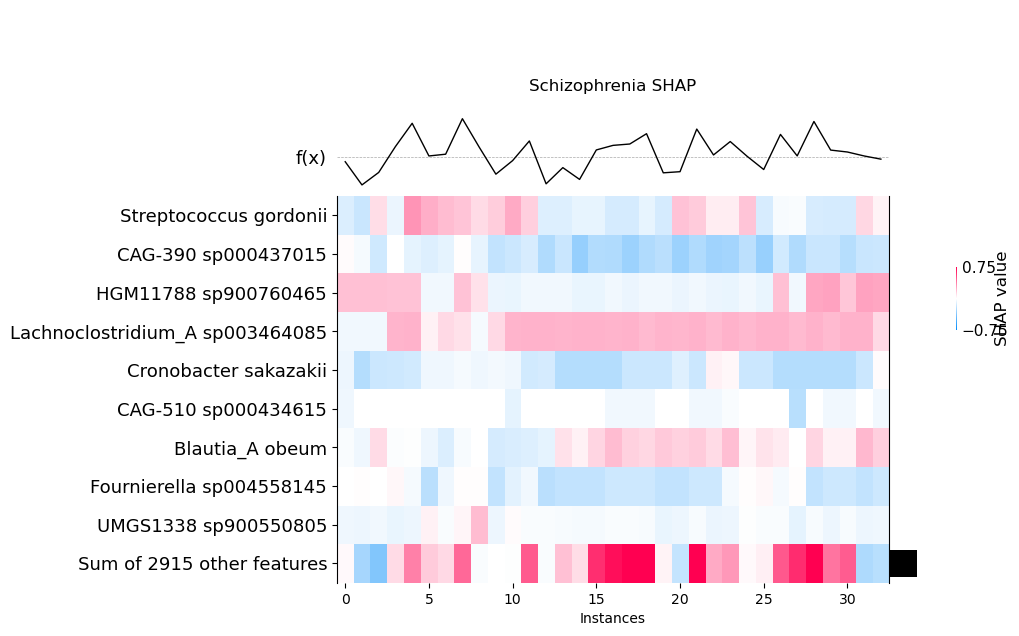

In [126]:
#7. Zhu2020 Schizophrenia
fname = '../../../snakemake/data/Zhu2020Schizophrenia/classify_new/GB_moving-pictures-classifier_new/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Zhu2020Schizophrenia/classify_new/GB_moving-pictures-classifier_new/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Zhu2020Schizophrenia/Zhu2020Schizophrenia_filtered_new.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Zhu2020Schizophrenia/Zhu2020Schizophrenia_metadata_matched_new.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Zhu2020Schizophrenia/classify_new/GB_moving-pictures-classifier_new/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
# shap_values = explainer.shap_values(X_test)

# shap.summary_plot(shap_values, X_test, max_display=20)
shap_values = explainer(X_test)
#shap.summary_plot(shap_values, X_test)
shap.plots.heatmap(shap_values,feature_values=shap_values.abs.max(0), show=False)
plt.title('Schizophrenia SHAP')
plt.savefig('Schizophrenia_and_controls.pdf', bbox_inches = "tight")

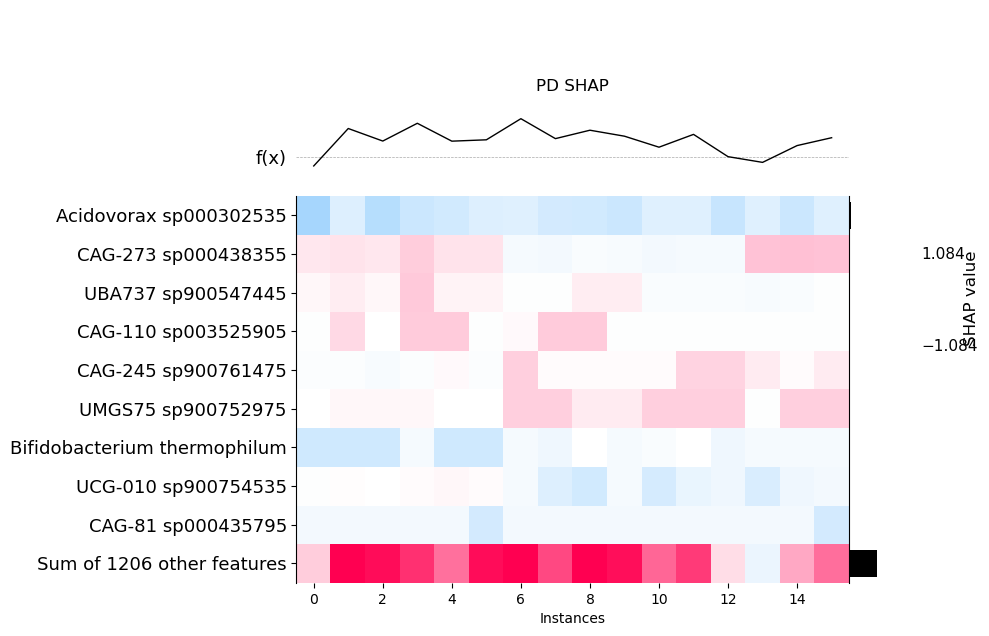

In [9]:
#8. Qian2020 Parkinson's Disease(PD)
fname = '../../../snakemake/data/Qian2020PD/classify/GB-pictures-classifier/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Qian2020PD/classify/GB-pictures-classifier/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Qian2020PD/Qian2020PD.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Qian2020PD/SraRunTable.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Qian2020PD/classify/GB-pictures-classifier/sample_estimator.qza'
# model = qiime2.Artifact.load(fname).view(Pipeline)
# explainer = shap.TreeExplainer(model['est'])
# shap_values = explainer.shap_values(X_test)

# shap.summary_plot(shap_values, X_test, max_display=20)

model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer(X_test)
#shap.summary_plot(shap_values, X_test)
shap.plots.heatmap(shap_values,feature_values=shap_values.abs.max(0), show=False)
plt.title('PD SHAP')
plt.savefig('PD_and_controls.pdf', bbox_inches = "tight")

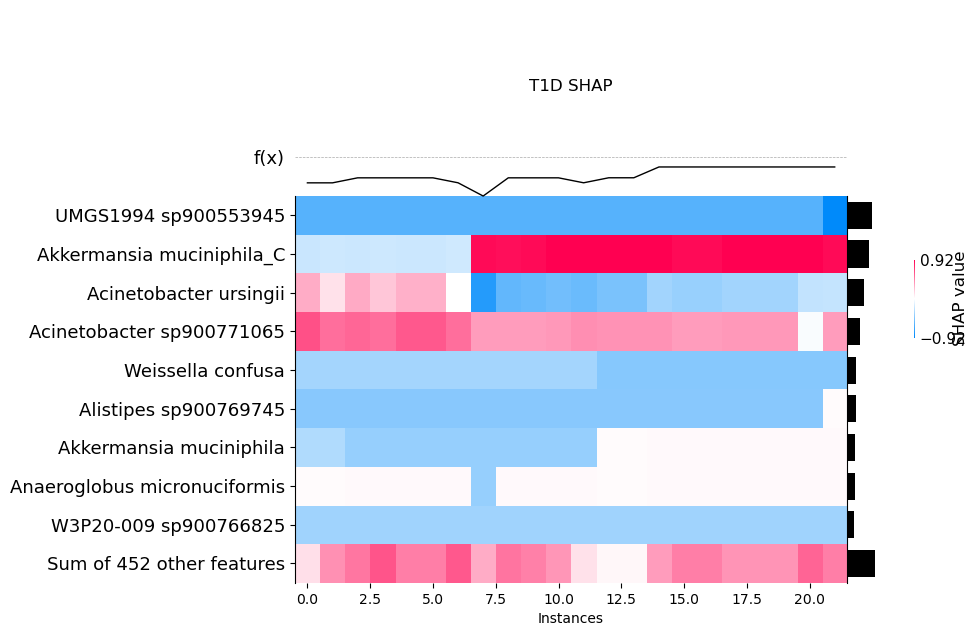

In [10]:
#9. diabimmue Type 1 Diabetes(T1D)
fname = '../../../snakemake/data/Kostic2015T1D/new/classify/GB-pictures-classifier/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Kostic2015T1D/new/classify/GB-pictures-classifier/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Kostic2015T1D/new/diabimmune.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Kostic2015T1D/new/Kostic_metadata_matched.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Kostic2015T1D/new/classify/GB-pictures-classifier/sample_estimator.qza'
# model = qiime2.Artifact.load(fname).view(Pipeline)
# explainer = shap.TreeExplainer(model['est'])
# shap_values = explainer.shap_values(X_test)

# shap.summary_plot(shap_values, X_test, max_display=20)
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer(X_test)
#shap.summary_plot(shap_values, X_test)
shap.plots.heatmap(shap_values,feature_values=shap_values.abs.max(0), show=False)
plt.title('T1D SHAP')
plt.savefig('T1D_and_controls.pdf', bbox_inches = "tight")

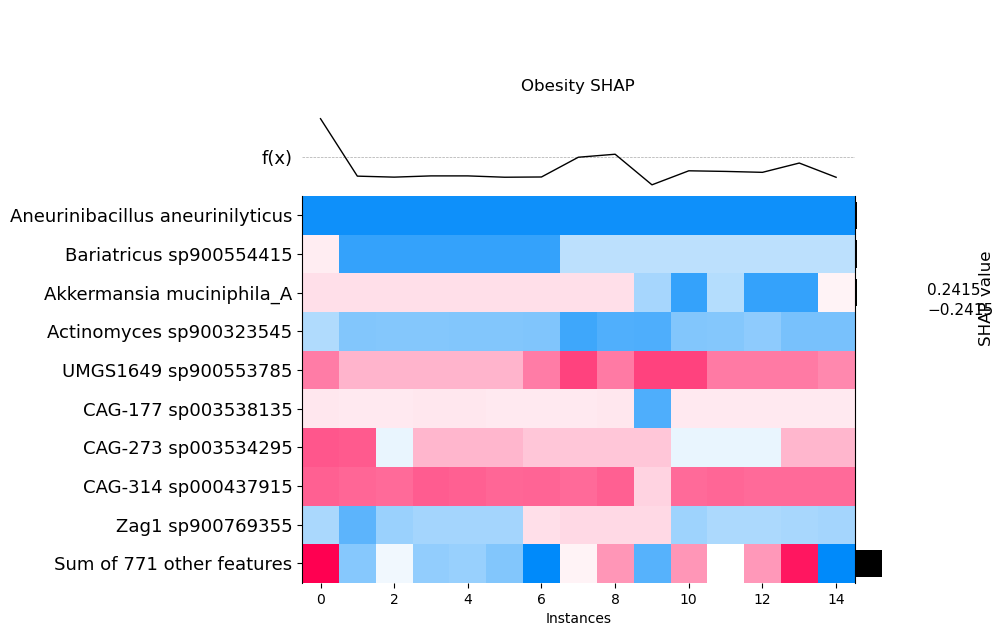

In [11]:
#10. Qin2010 Obesity
fname = '../../../snakemake/data/Qin2010IBD/classify_obesity/GB-pictures-classifier_obesity_p10/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Qin2010IBD/classify_obesity/GB-pictures-classifier_obesity_p10/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Qin2010IBD/Qin2010Obesity.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Qin2010IBD/Qin2010Obesity_metadata_simple.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Qin2010IBD/classify_obesity/GB-pictures-classifier_obesity_p10/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
# shap_values = explainer.shap_values(X_test)

# shap.summary_plot(shap_values, X_test, max_display=20)
shap_values = explainer(X_test)
#shap.summary_plot(shap_values, X_test)
shap.plots.heatmap(shap_values,feature_values=shap_values.abs.max(0), show=False)
plt.title('Obesity SHAP')
plt.savefig('Obesity_and_controls.pdf', bbox_inches = "tight")


In [11]:
shap.force_plot(explainer.expected_value, shap_values[0,:])

In [19]:
import seaborn as sns



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot:ylabel='Density'>

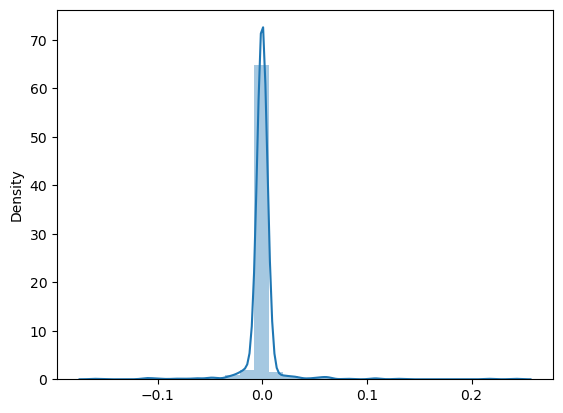

In [21]:
sns.distplot(shap_values[0,:])



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot:ylabel='Density'>

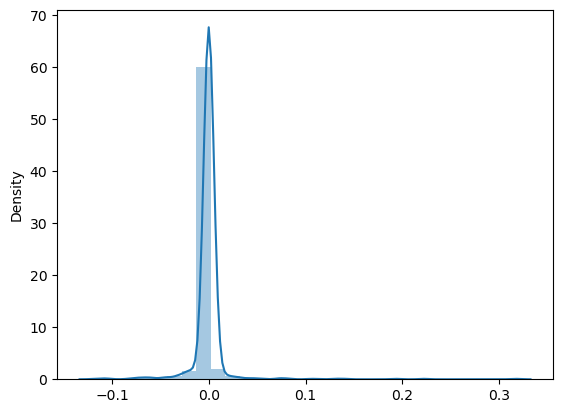

In [22]:
sns.distplot(shap_values[1,:])

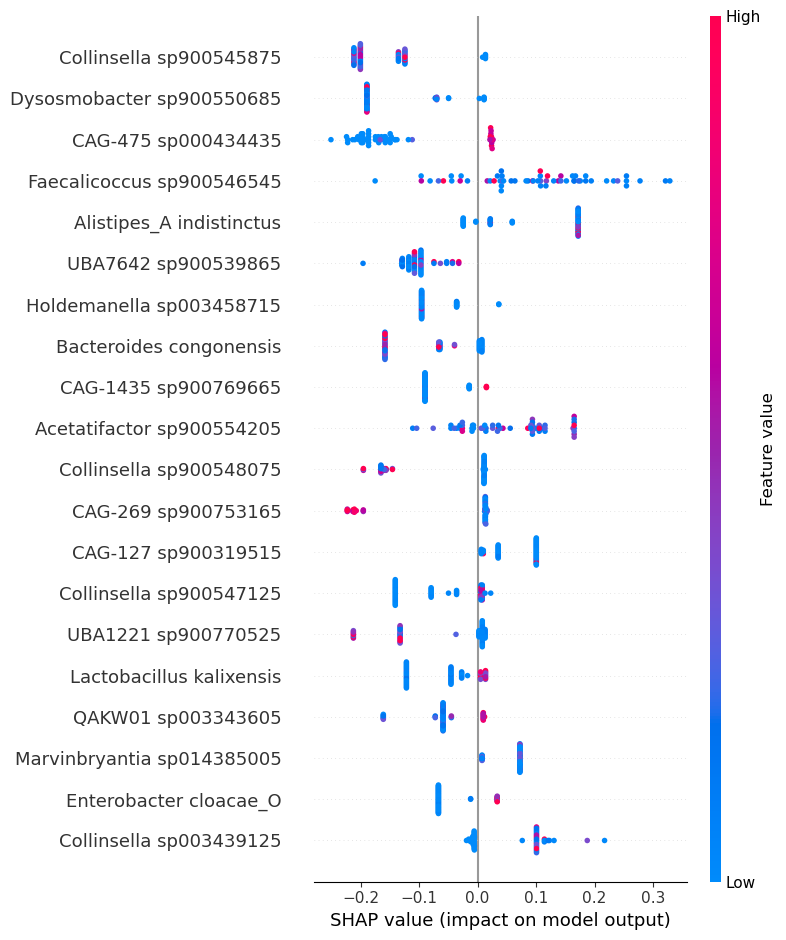

In [12]:
#ASD_all
fname = '../../../snakemake/data/ASD_294samples/GB-pictures-classifier/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/ASD_294samples/GB-pictures-classifier/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/ASD_294samples/ASD.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/ASD_294samples/ASD_metadata_matched.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/ASD_294samples/GB-pictures-classifier/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)#, max_display=30)

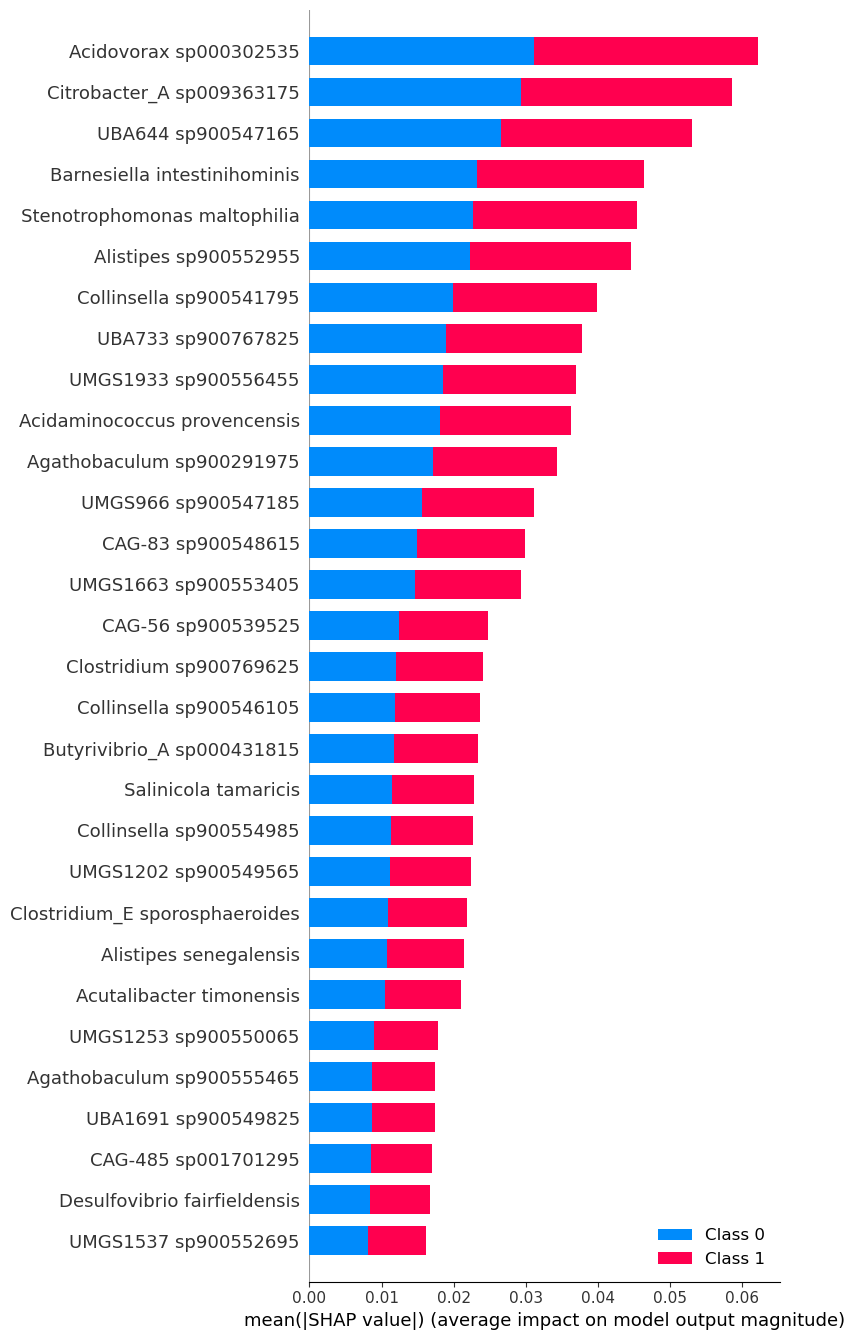

In [10]:
#Dan2020ASD Random Forest
fname = '../../../snakemake/data/Dan2020ASD_rl150/classify/moving-pictures-classifier/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Dan2020ASD_rl150/classify/moving-pictures-classifier/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Dan2020ASD_rl150/Dan2020ASD.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Dan2020ASD_rl150/metadata_simple.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Dan2020ASD_rl150/classify/moving-pictures-classifier/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=30)

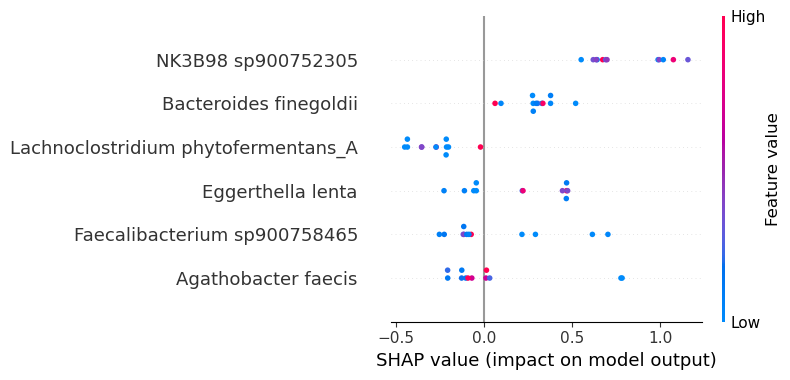

In [33]:
#iMSMS2021MS GradientBoosting
fname = '../../../snakemake/data/iMSMS2021MS/classify/moving-pictures-classifier/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/iMSMS2021MS/classify/moving-pictures-classifier/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/iMSMS2021MS/iMSMS2021MS_filtered.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/iMSMS2021MS/iMSMS2021MS_metadata_matched.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/iMSMS2021MS/classify/moving-pictures-classifier/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=30)

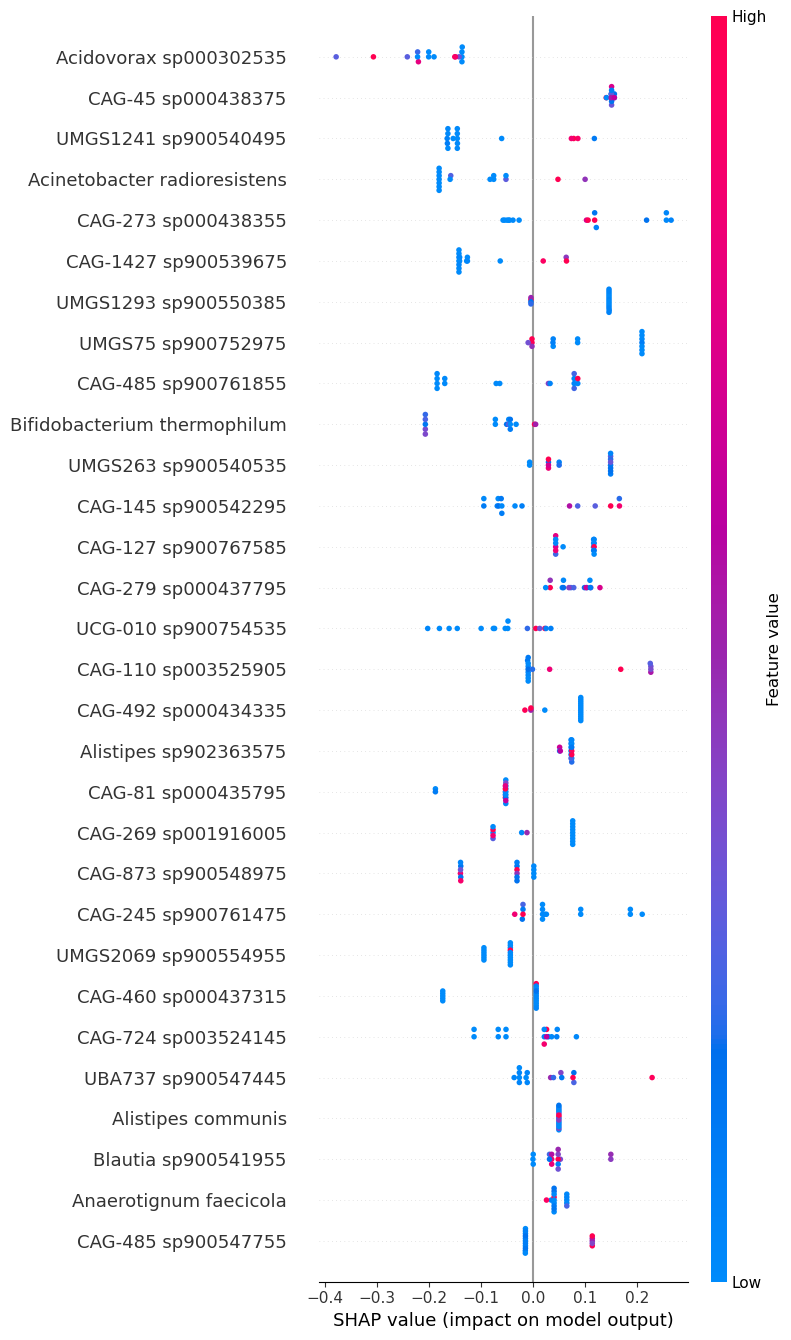

In [6]:
#Qian2020PD
fname = '../../../snakemake/data/Qian2020PD/classify/GB-pictures-classifier/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Qian2020PD/classify/GB-pictures-classifier/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Qian2020PD/Qian2020PD.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Qian2020PD/SraRunTable.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Qian2020PD/classify/GB-pictures-classifier/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=30)

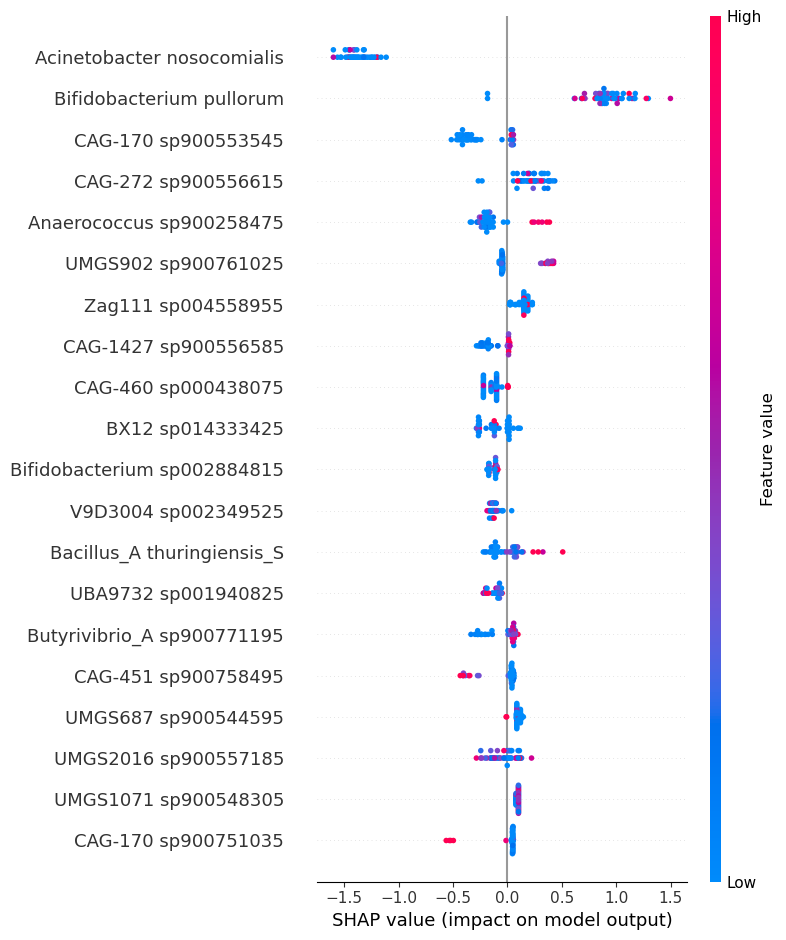

In [21]:
#ASD_Dan_Wang_Wan
fname = '../../../snakemake/data/ASD/GB-250samples_pictures-classifier_p100/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/ASD/GB-250samples_pictures-classifier_p100/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/ASD/ASD_250_3studies.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/ASD/ASD_metadata_matched.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/ASD/GB-250samples_pictures-classifier_p100/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=20)

In [24]:
shap.force_plot(explainer.expected_value, shap_values[0,:])

In [29]:
shap.plots.bar(shap_values)

AssertionError: You must pass an Explanation object, Cohorts object, or dictionary to bar plot!

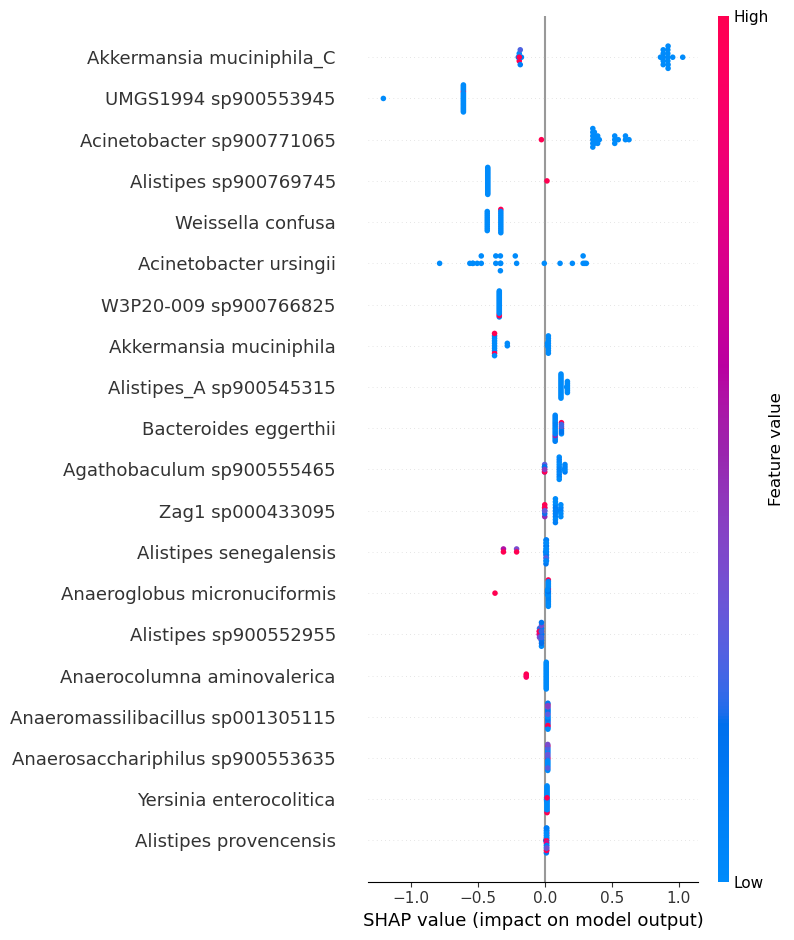

In [35]:
#T1D
fname = '../../../snakemake/data/Kostic2015T1D/new/classify/GB-pictures-classifier/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Kostic2015T1D/new/classify/GB-pictures-classifier/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Kostic2015T1D/new/diabimmune.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Kostic2015T1D/new/Kostic_metadata_matched.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Kostic2015T1D/new/classify/GB-pictures-classifier/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=20)

In [36]:
#all
fname = '../../../snakemake/data/Classify_9studies/GB-pictures-classifier/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Classify_9studies/GB-pictures-classifier/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Classify_9studies/all_9studies_1003.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Classify_9studies/Metadata.all.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Classify_9studies/GB-pictures-classifier/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=20)

AssertionError: GradientBoostingClassifier is only supported for binary classification right now!

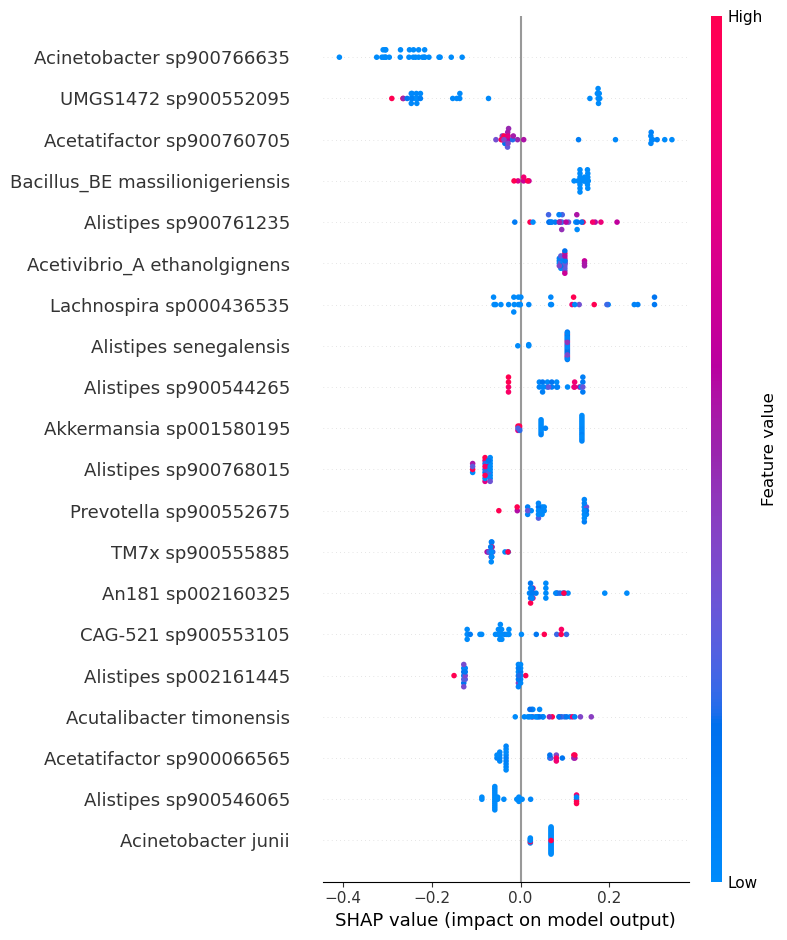

In [37]:
#IBD-UC
fname = '../../../snakemake/data/Nielsen2014_spain/classify/GB-pictures-classifier_140/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Nielsen2014_spain/classify/GB-pictures-classifier_140/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Nielsen2014_spain/Nielsen2014UC_filtered_140.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Nielsen2014_spain/Nielsen2014UC_matched_new.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Nielsen2014_spain/classify/GB-pictures-classifier_140/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=20)